# Phase II


## Research Question

- To what extent does environmental quality, including factors like air and water quality, impact the satisfaction levels of residents in counties?
- To what extent do health outcomes, such as life expectancy, prevalence of mental diseases, and healthcare quality, contribute to the levels of satisfaction among residents in different counties?
- What role does the perception of safety and the prevalence of crime play in shaping the overall satisfaction levels within counties, and how can public safety policies be optimized for improved satisfaction?
- How do economic disparities within countries affect the overall satisfaction of residents, and what strategies can be implemented to mitigate these disparities?


### Importing

In [281]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb

### Data Overview

Our data utilized five different CSV to observe the various aspects that affect life satisfaction globally. We separated the tables into health factors, economical factors, and demography factors. Under health factors we analyzed the number of suicides and mental disorders different populations had. Under demography, we analyzed infant mortality rate, maternal mortality ratio, birth rate, and life expectancy. We also looked at cost of living, GDP, minimum wage, and crime rates. We analyzed over 200 different countries and compared the countries that included the most data between the CSV files.

In [294]:
suicide_df = pd.read_csv('master.csv')
mental_health_df = pd.read_csv('Mental health Depression disorder Data.csv', dtype='unicode')
happiness_df = pd.read_csv('2022.csv', thousands=',')

## Data Cleaning

### Mental Disorders

Print General Information about the mental health data 

In [295]:
mental_health_df.drop('Code', axis=1, inplace=True)

Simplify Mental Disorder Data

In [296]:
#Rename the Entity column to countries
mental_health_df = mental_health_df.rename(columns={'Entity': 'Countries'})

# #Remove NaN
mental_health_df = mental_health_df.dropna()

# Make years into int, since it was an object before
mental_health_df['Year'] = mental_health_df['Year'].astype(int)

# remove years before 2013 
mental_health_df = mental_health_df[mental_health_df['Year'] >= 2013]

# Remove the data in the percentages that aren't numeric. Ex) 
columns_to_convert = [
    'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
    'Anxiety disorders (%)', 'Drug use disorders (%)',
    'Depression (%)', 'Alcohol use disorders (%)'
]
mental_health_df[columns_to_convert] = mental_health_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
mental_health_df.dropna(subset=columns_to_convert, inplace=True)


# Group the disorder percentage mean for 2013-2017
averages_by_country = mental_health_df.groupby('Countries').mean()
averages_by_country.drop(axis=0, columns=['Year','index'], inplace=True)
averages_by_country.reset_index(inplace=True)
print(averages_by_country)


                      Countries  Schizophrenia (%)  Bipolar disorder (%)  \
0                   Afghanistan           0.165882              0.707279   
1                       Albania           0.200605              0.704141   
2                       Algeria           0.197709              0.817824   
3                American Samoa           0.248964              0.468421   
4          Andean Latin America           0.200701              0.881123   
..                          ...                ...                   ...   
226  Western Sub-Saharan Africa           0.174619              0.636718   
227                       World           0.254415              0.596277   
228                       Yemen           0.172382              0.735498   
229                      Zambia           0.165007              0.605270   
230                    Zimbabwe           0.156640              0.609488   

     Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0          

### Suicide Table

In [297]:
#Rename the Entity column to countries
suicide_df = suicide_df.rename(columns={'country': 'Countries'})

# drop years before 2013
suicide_df = suicide_df[suicide_df['year'] >= 2013]
suicide_df.reset_index(drop=True, inplace=True)

# Add the suicide number together if the country and eyar is the same
suicide_df = suicide_df.groupby(['Countries', 'year'])['suicides_no'].sum().reset_index()

# Total number of suicides on the most recent years
suicide_2013_to_2017_df = suicide_df.groupby('Countries')['suicides_no'].sum().reset_index()
print(suicide_2013_to_2017_df)


              Countries  suicides_no
0   Antigua and Barbuda            1
1             Argentina         9291
2               Armenia          266
3             Australia         8526
4               Austria         5057
..                  ...          ...
79              Ukraine        15542
80       United Kingdom        14522
81        United States       128101
82              Uruguay         1767
83           Uzbekistan         4045

[84 rows x 2 columns]


### Happiness Table:

remove columns that aren't the happiness score

In [298]:

#Rename the Entity column to countries
happiness_df = happiness_df.rename(columns={'Country': 'Countries'})

happiness_df = happiness_df.drop(axis=0, columns=['Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'RANK'])


print(happiness_df)

       Countries  Happiness score
0        Finland           7821.0
1        Denmark           7636.0
2        Iceland           7557.0
3    Switzerland           7512.0
4    Netherlands           7415.0
..           ...              ...
142      Rwanda*           3268.0
143     Zimbabwe           2995.0
144      Lebanon           2955.0
145  Afghanistan           2404.0
146           xx              NaN

[147 rows x 2 columns]


### Merge all 3 tables by country

In [299]:
merged_1_2_df= pd.merge(averages_by_country, suicide_2013_to_2017_df, on='Countries', how='inner')
health_df = pd.merge(merged_1_2_df, happiness_df, on='Countries', how='inner')
print(health_df.head())
print(health_df.shape)

print(health_df.columns)


   Countries  Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
0  Argentina           0.197961              0.772578              0.397766   
1    Armenia           0.196526              0.716817              0.164855   
2  Australia           0.364150              1.144993              0.942223   
3    Austria           0.256640              0.939808              0.674277   
4    Bahrain           0.206873              0.836296              0.269325   

   Anxiety disorders (%)  Drug use disorders (%)  Depression (%)  \
0               6.278569                0.989317        3.657941   
1               2.590217                0.495973        2.740602   
2               6.595998                2.181237        4.694260   
3               5.345074                0.909465        3.265730   
4               4.657096                1.710888        3.896715   

   Alcohol use disorders (%)  suicides_no  Happiness score  
0                   1.823537         9291           596



## Exploratory Data Analysis:

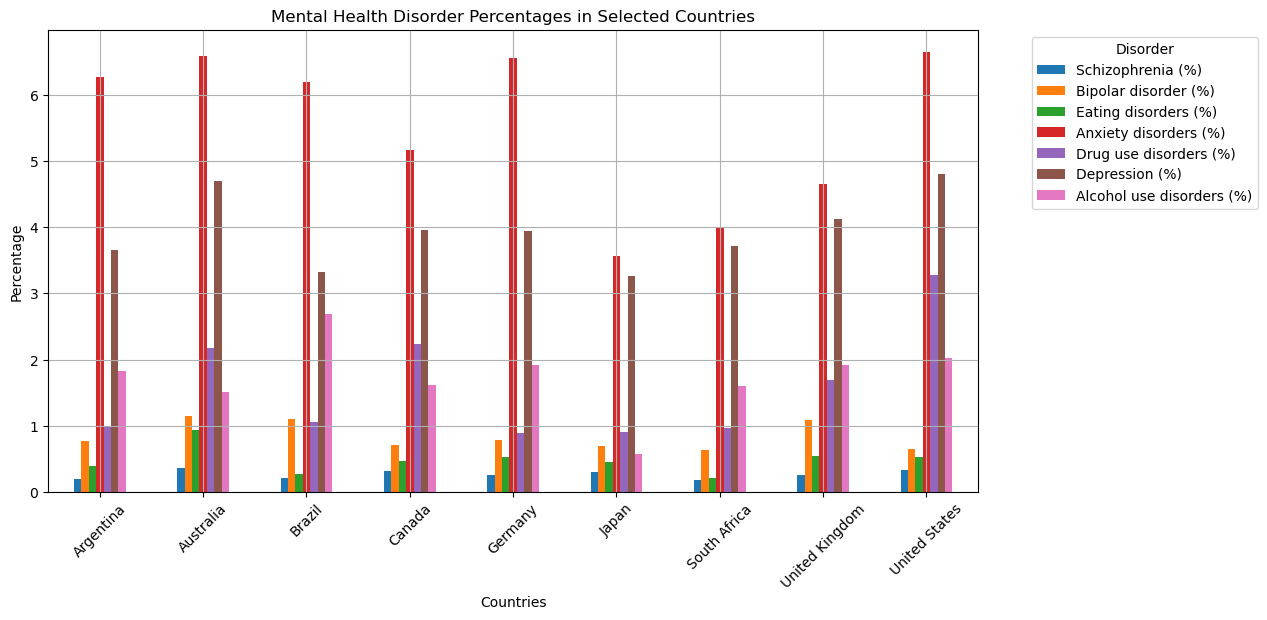

In [301]:
selected_countries = ['United States',  'Brazil', 'United Kingdom',
             'Australia', 'South Africa', 'Canada', 'Germany',
             'Japan', 'Argentina']

# Filter it, include only the selected countries
health_select_df= health_df[health_df['Countries'].isin(selected_countries)]

disorders = ['Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)']

ax = health_select_df.plot(x='Countries', y=disorders, kind='bar', figsize=(12, 6) )
plt.title('Mental Health Disorder Percentages in Selected Countries')
plt.xlabel('Countries')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


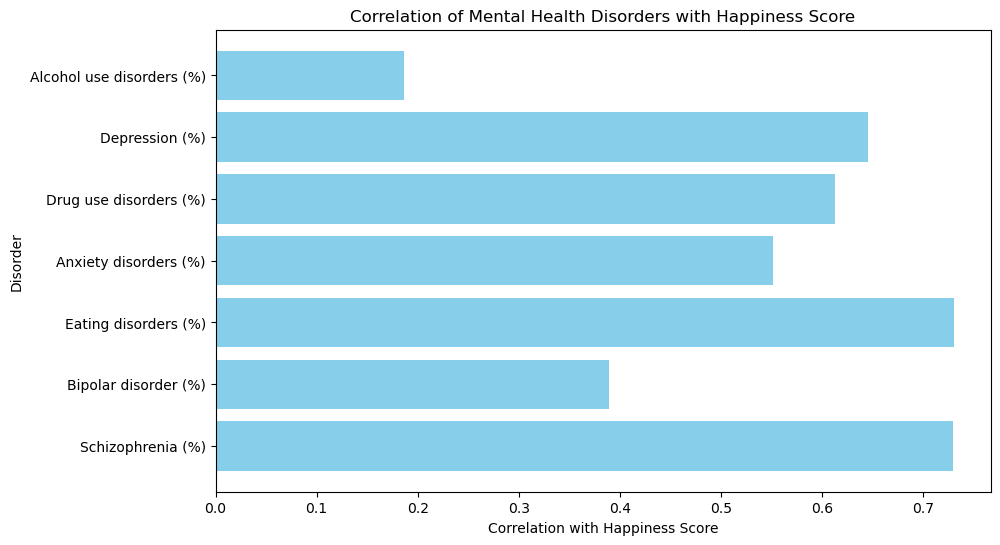

In [302]:

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html
# https://stackoverflow.com/questions/38422001/pandas-dataframe-corrwith-method
correlations = health_select_df[disorders].corrwith(health_select_df['Happiness score'])

# https://www.geeksforgeeks.org/python-pandas-index-values/
correlation_df = pd.DataFrame({'Disorder': correlations.index, 'Correlation': correlations.values})

plt.figure(figsize=(10, 6))
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html
plt.barh(correlation_df['Disorder'], correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlation with Happiness Score')
plt.ylabel('Disorder')
plt.title('Correlation of Mental Health Disorders with Happiness Score')

plt.show()


/Users/maggielam/anaconda3/envs/info2950/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/maggielam/anaconda3/envs/info2950/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


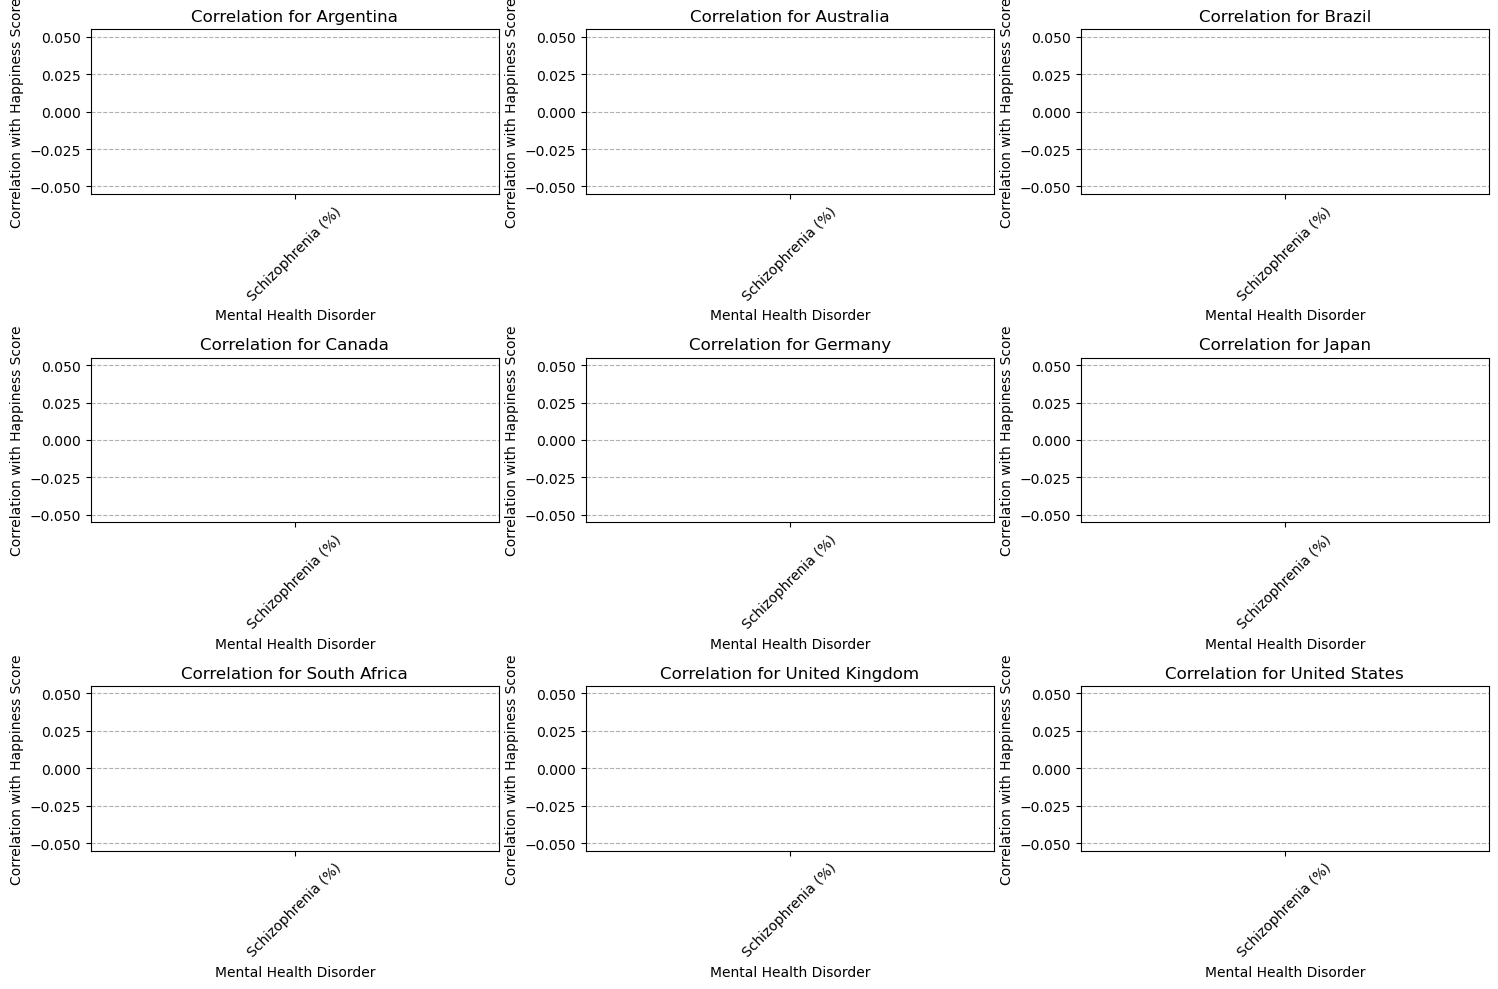

In [307]:
nrows = 3
ncols = 3


# # Convert happiness to float and remove commas
plt.figure(figsize=(15, 10))
for i, country in enumerate(data['Countries']):
    # Filter data for the current country
    country_data = health_select_df[health_select_df['Countries'] == country]
    
    plt.subplot(nrows, ncols, i + 1)
    
    for disorder in disorders:
        correlation = country_data[disorder].corr(country_data['Happiness score'])
        plt.bar(disorder, correlation, color='skyblue')
        plt.xlabel('Mental Health Disorder')
        plt.ylabel('Correlation with Happiness Score')
        plt.title(f'Correlation for {country}')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

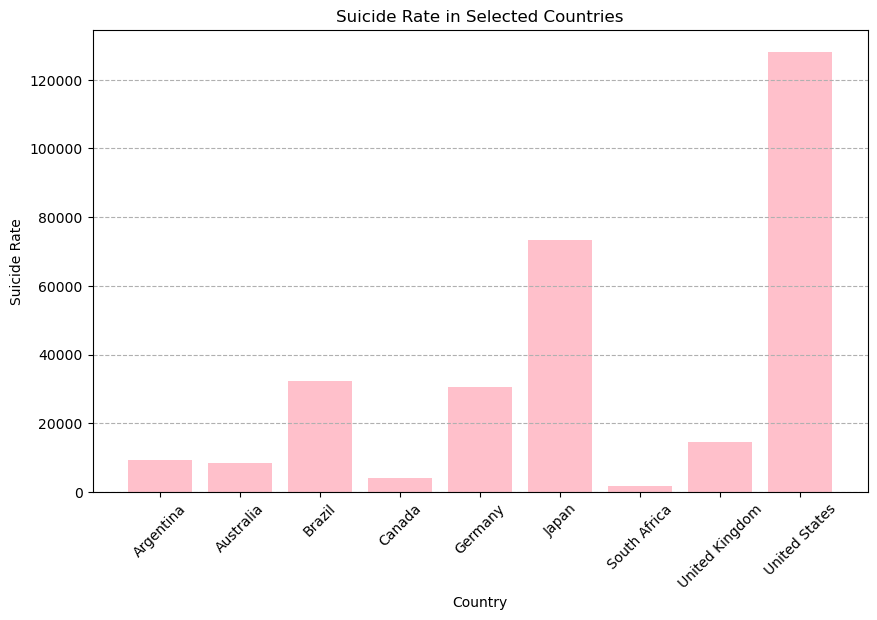

In [304]:

plt.figure(figsize=(10, 6))
plt.bar(health_select_df['Countries'], health_select_df['suicides_no'], color='pink')
plt.xlabel('Country')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate in Selected Countries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

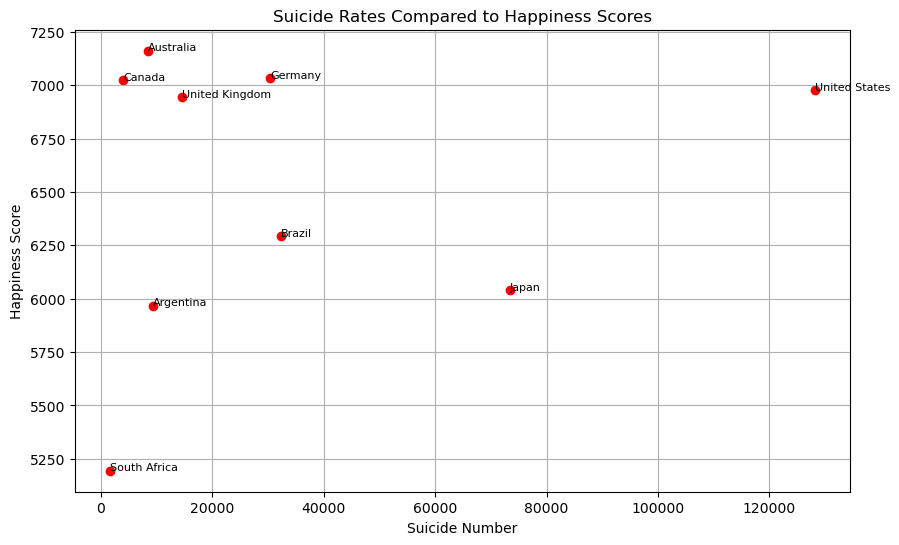

In [305]:
plt.figure(figsize=(10, 6))
plt.scatter(health_select_df['suicides_no'], health_select_df['Happiness score'], c='red', marker='o')

# make label
# https://www.statology.org/pandas-scatter-plot-label-points/
for i, row in health_select_df.iterrows():
    plt.annotate(row['Countries'], (row['suicides_no'], row['Happiness score']), fontsize=8)

plt.title('Suicide Rates Compared to Happiness Scores')
plt.xlabel('Suicide Number')
plt.ylabel('Happiness Score')
plt.grid()
plt.show()

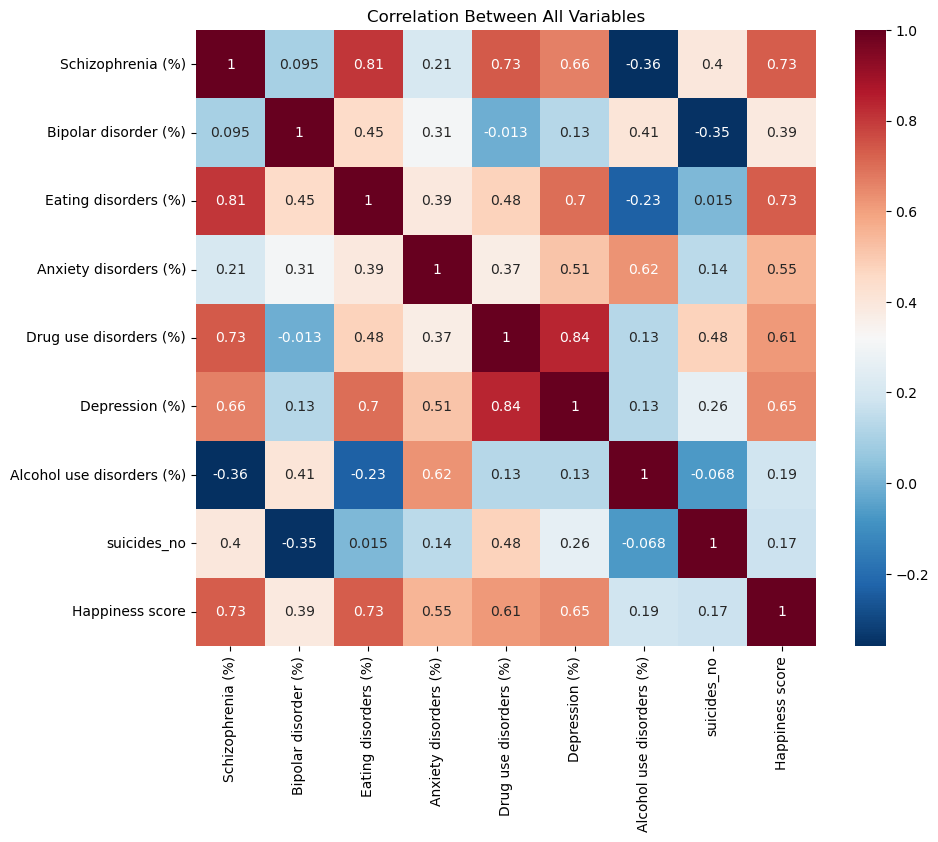

In [306]:
correlation_matrix = health_select_df.iloc[:, 1:].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', cbar=True)
plt.title('Correlation Between All Variables')
plt.show()

 
## Data Descriptions: 

### Motivation
1. For what purpose was the dataset created?


2. Who funded the creation of the dataset?

### Composition
1. Is any information missing from individual instances? 


2. What are the observations (rows) and the attributes (columns)?


3. What processes might have influenced what data was observed and recorded and what was not?

### Collection Process
1. How was the data associated with each instance acquired?


2. Over what timeframe was the data collected?


3. What preprocessing was done, and how did the data come to be in the form that you are using?

### Uses
1. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).


2. What (other) tasks could the dataset be used for?


3. Are there tasks for which the dataset should not be used?


## Data Limitations:

The Limitations on this is...